In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


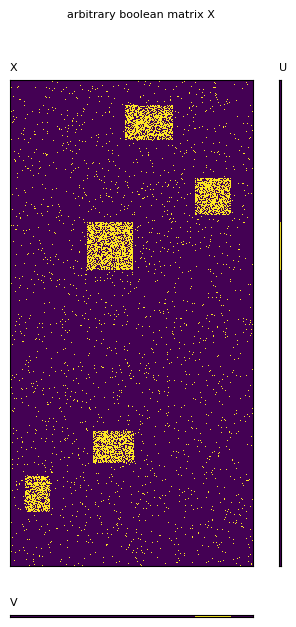

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## III. Prediction task with k-Fold Cross-Validation

Assume we have k and tau, now we optimize over w.

In [3]:
from datasets import CrossValidation

X_split = CrossValidation(X=X.X, test_size=0.2, n_folds=5, seed=1997)
X_split.negative_sample(train_val_size=X_split.pos_train_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')

[I] CrossValidation, sampling positives
[I]   seed         : 1997
[I]   n_folds      : 5
[I]   partition    : [0, 4501, 9002, 13503, 18003, 22503]
[I]   train + val  : 22503
[I]   test_size    : 5626
[I] CrossValidation, sampling negatives
[I]   seed         : 2023
[I]   n_folds      : 5
[I]   partition    : [0, 4501, 9002, 13503, 18003, 22503]
[I]   train + val  : 22503
[I]   test_size    : 5626


In [4]:
# empty table
from utils import add_log
metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction_val = pd.DataFrame(columns=columns)
df_prediction_test = pd.DataFrame(columns=columns)

In [5]:
# grid search, apply best

n_fold = 5

k = 5
tau = 0.15
w_list = [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

for w in w_list:

    for i in range(n_fold):
        # get current fold
        current_fold = i + 1
        X_data = X_split.get_fold(current_fold=current_fold)
        X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train)

        results = asso.eval(X_val, metrics=metrics, task='prediction')
        add_log(df_prediction_val, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

        # just to illustrate the accuracy gap between val and test
        # usually test data is not accessible during fitting
        results = asso.eval(X_test, metrics=metrics, task='prediction')
        add_log(df_prediction_test, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.88s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


100%|██████████| 5/5 [00:24<00:00,  4.92s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:25<00:00,  5.19s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.96s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.97s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.28s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.21s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.24s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.25s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.20s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.23s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.28s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.38s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.38s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:26<00:00,  5.40s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:28<00:00,  5.63s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:28<00:00,  5.74s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:27<00:00,  5.48s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:29<00:00,  5.90s/it]                         


[I] task         : prediction
[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:28<00:00,  5.77s/it]                         


[I] task         : prediction


In [8]:
# find best params

df = df_prediction_val.copy()
display(df)
df = df.groupby(['p_pos', 'p_neg']).mean().reset_index()
display(df)

best_idx = df['F1'].idxmax()
p_pos = df['p_pos'][best_idx]
p_neg = df['p_neg'][best_idx]
w = [p_pos, p_neg]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:48:31.144887,5,0.15,0.6,0.4,0.221062,0.866725,0.406465,0.593535,0.352275
1,2023-12-08 04:49:03.955334,5,0.15,0.6,0.4,0.237947,0.865804,0.399467,0.600533,0.373301
2,2023-12-08 04:49:38.333342,5,0.15,0.6,0.4,0.211953,0.884152,0.407909,0.592091,0.341935
3,2023-12-08 04:50:11.260055,5,0.15,0.6,0.4,0.192000,0.877157,0.417444,0.582556,0.315041
4,2023-12-08 04:50:44.240694,5,0.15,0.6,0.4,0.225556,0.868263,0.404333,0.595667,0.358088
5,2023-12-08 04:51:18.811742,5,0.15,0.7,0.3,0.583648,0.865568,0.253499,0.746501,0.697187
6,2023-12-08 04:51:52.936655,5,0.15,0.7,0.3,0.578094,0.865602,0.255832,0.744168,0.693220
7,2023-12-08 04:52:27.272211,5,0.15,0.7,0.3,0.582315,0.878646,0.249056,0.750944,0.700428
8,2023-12-08 04:53:01.604057,5,0.15,0.7,0.3,0.590444,0.870862,0.248556,0.751444,0.703748
9,2023-12-08 04:53:35.708261,5,0.15,0.7,0.3,0.583111,0.865435,0.253778,0.746222,0.696760


C:\Users\nieht\AppData\Local\Temp\ipykernel_31976\2615849137.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['p_pos', 'p_neg']).mean().reset_index()


,p_pos,p_neg,k,tau,Recall,Precsion,Error,Accuracy,F1
0,0.6,0.4,5.0,0.15,0.217704,0.872420,0.407124,0.592876,0.348128
1,0.7,0.3,5.0,0.15,0.583522,0.869223,0.252144,0.747856,0.698268
2,0.8,0.2,5.0,0.15,0.665111,0.867796,0.218127,0.781873,0.753042
3,0.9,0.1,5.0,0.15,0.672044,0.794384,0.251678,0.748322,0.727795


In [7]:
# check if the best w on X_val is best on X_test
display(df_prediction_test)

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-08 04:48:35.391214,5,0.15,0.6,0.4,0.224671,0.853477,0.406950,0.593050,0.355706
1,2023-12-08 04:49:08.422085,5,0.15,0.6,0.4,0.244401,0.871909,0.395752,0.604248,0.381785
2,2023-12-08 04:49:42.597840,5,0.15,0.6,0.4,0.220761,0.866109,0.406683,0.593317,0.351841
3,2023-12-08 04:50:15.506210,5,0.15,0.6,0.4,0.194632,0.880225,0.415926,0.584074,0.318777
4,2023-12-08 04:50:48.461144,5,0.15,0.6,0.4,0.220228,0.864620,0.407128,0.592872,0.351041
5,2023-12-08 04:51:23.054288,5,0.15,0.7,0.3,0.587096,0.866702,0.251600,0.748400,0.700011
6,2023-12-08 04:51:57.120709,5,0.15,0.7,0.3,0.593672,0.866857,0.248756,0.751244,0.704716
7,2023-12-08 04:52:31.521918,5,0.15,0.7,0.3,0.594383,0.872879,0.246090,0.753910,0.707201
8,2023-12-08 04:53:05.784090,5,0.15,0.7,0.3,0.600782,0.869118,0.244845,0.755155,0.710457
9,2023-12-08 04:53:39.948135,5,0.15,0.7,0.3,0.588518,0.866981,0.250889,0.749111,0.701112
